In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [2]:
df = pd.read_csv('./inv7_emi_data_t345678.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[5]},
                index_col=['datetime']
                )

In [3]:
df['time'] = df.index
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['dayname'] = df.index.day_name()
df['hourofweek'] = df.hour+24*df.dayofweek
df['hourofmonth'] = df.hour+24*(df.day-1)
df['Tcell']=df['Ambient temperature(℃)']+df['Irradiance(W/㎡)']/800*(25-20)
df['Pm']=2.172*1.303*220*2*590*df['Irradiance(W/㎡)']/1000*(1+0.0045*(df['Tcell']-25))*20.5/100
df['Hieu suat']=df['Total input power(kW)']*1000/df['Pm']*100
df['date'] = df.index.date
df=df[df['Ambient temperature(℃)']>6]
df=df[df['Irradiance(W/㎡)']>300]
df=df[df['Total input power(kW)']>76]
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Site Name,Management Domain,ManageObject_x,Ambient temperature(℃),PV Temperature(℃),Wind speed(m/s),Wind direction(°),Daily irradiation(MJ/㎡),...,day,hour,dayofweek,dayname,hourofweek,hourofmonth,Tcell,Pm,Hieu suat,date
datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-04 10:15:00,103,103,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,30.6,38.8,1.7,NaN,3.870,...,4,10,4,Friday,106,82,33.537500,73507.755992,116.946843,2022-03-04
2022-03-04 10:20:00,104,104,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.4,41.2,1.4,NaN,4.039,...,4,10,4,Friday,106,82,33.389375,99765.707730,87.199301,2022-03-04
2022-03-04 10:25:00,105,105,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.3,42.0,2.4,NaN,4.252,...,4,10,4,Friday,106,82,34.078750,119863.526665,74.065066,2022-03-04
2022-03-04 10:30:00,106,106,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.3,42.9,4.5,NaN,4.197,...,4,10,4,Friday,106,82,34.449375,129366.728410,69.825527,2022-03-04
2022-03-04 10:35:00,107,107,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.7,44.7,0.8,NaN,4.444,...,4,10,4,Friday,106,82,34.868125,130072.464747,69.235253,2022-03-04
2022-03-04 10:40:00,108,108,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.7,45.6,2.0,NaN,4.692,...,4,10,4,Friday,106,82,34.773750,127645.289181,70.493005,2022-03-04
2022-03-04 10:45:00,109,109,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,30.6,46.5,3.0,NaN,4.942,...,4,10,4,Friday,106,82,35.882500,133532.155492,69.270207,2022-03-04
2022-03-04 10:50:00,110,110,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,31.3,47.2,2.2,NaN,5.194,...,4,10,4,Friday,106,82,36.598125,134338.280105,69.234919,2022-03-04
2022-03-04 10:55:00,111,111,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,30.7,47.5,1.5,NaN,5.447,...,4,10,4,Friday,106,82,36.038750,135044.514571,69.360092,2022-03-04


In [4]:
df1=df.groupby(['month','date','hour'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()
df1=df1.reset_index()
df1=df1[df1.groupby(['month','date'])['Irradiance(W/㎡)'].transform(max)==df1['Irradiance(W/㎡)']]
df1=df1.reset_index()
df1['Tcell']=df1['Ambient temperature(℃)']+df1['Irradiance(W/㎡)']/800*(25-20)
df1['Pm']=2.172*1.303*220*2*590*df1['Irradiance(W/㎡)']/1000*(1+0.0045*(df1['Tcell']-25))*20.5/100
df1['Hieu suat']=df1['Total input power(kW)']*1000/df1['Pm']*100
df1=df1[df1['Hieu suat']<80]
print(df1)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Total input power(kW)'],
    name="Sản lượng điện trung bình cao nhất theo khung giờ mỗi ngày inverter 7 "))
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Hieu suat'],
    name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 7 "))
fig . update_traces (
    showlegend = True 
    )
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

C:\Users\badao\AppData\Local\Temp\ipykernel_22632\1314832920.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby(['month','date','hour'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()


     index  month        date  hour  Total input power(kW)  \
0        1      3  2022-03-04    11              93.006667   
1        2      3  2022-03-19    12              80.175667   
2        4      3  2022-03-21    10              88.203000   
3        7      3  2022-03-22    11              95.951667   
4       14      3  2022-03-23    12              97.676182   
..     ...    ...         ...   ...                    ...   
107    607      8  2022-08-19    12              94.198667   
108    614      8  2022-08-21    14             105.119000   
109    619      8  2022-08-22    12              95.491083   
110    624      8  2022-08-23    11              94.808500   
111    629      8  2022-08-24    11              90.952556   

     Ambient temperature(℃)  Irradiance(W/㎡)      Tcell             Pm  \
0                 23.300000       842.800000  28.567500  128974.542439   
1                  7.066667       859.033333  12.435625  122066.484727   
2                 10.500000      

In [5]:
df1['stt']=df1.index
df_bin = df1[['stt', 'Hieu suat']] 
  
# Taking only the selected two attributes from the dataset 
df_bin.columns = ['stt', 'Hieu suat'] 
  
# Renaming the columns for easier writing of the code 
df_bin.head() 

,stt,Hieu suat
0,0,72.112422
1,1,65.681966
2,2,74.073121
3,3,65.522099
4,4,65.600831


In [6]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

Estimated coefficients:
b_0 = 66.90340288220438
b_1 = -0.0562830029149685


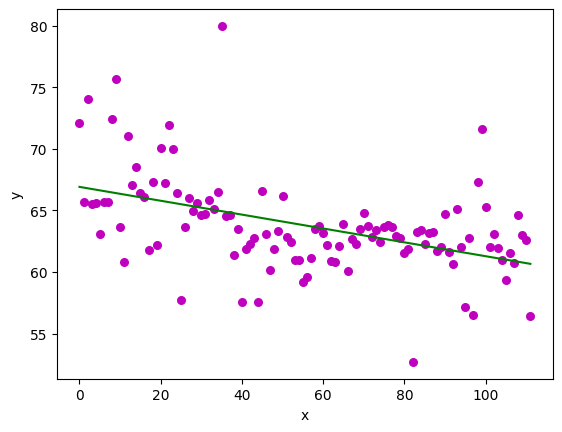

In [7]:
x=df_bin['stt'].tolist()
y=df_bin['Hieu suat'].tolist()
x=np.array(x)
y=np.array(y)
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
plot_regression_line(x, y, b) 
y_pred= b[0] + b[1]*x

In [8]:
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=y_pred,
    name="Hiệu suất tuyến tính inverter 7 "))